<img alt="Colaboratory logo" width="100%" src="https://raw.githubusercontent.com/LuisCSGuimaraes/Estudos/main/Images/BannerNew.png">


*Um projeto inspirado por:*

<img alt="Colaboratory logo" width="10%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

**Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*



---

  

# Os números da pandemia - Panorama da COVID-19 no Brasil e no Mundo

A COVID-19, doença causada pelo vírus SARS-CoV-2, teve seus primeiros casos apresentados na cidade de Wuhan, capital da província de Hubei, na China, no final do ano de 2019. A doença pode apresentar-se como uma infecção branda, podendo também desencadear pneumonia, insuficiência respiratória e até a morte.

No dia 23 de janeiro de 2020, foi decretada quarentena na cidade de Wuhan, no entanto, a doença não ficou restrita àquela localidade e espalhou-se, primeiramente, pela China, em seguida, Ásia e, assim, para outros países. No dia 11 de março do mesmo ano, a Organização Mundial de Saúde (OMS) decretou estado de pandemia da COVID-19. Naquela data, já havia mais de 118 mil casos da doença registrados em mais de 100 países e 4.291 mortes. (Fonte: [Biologianet](https://www.biologianet.com/doencas/pandemia.htm))

<center><img alt="Coronavirus" width="100%" src="https://raw.githubusercontent.com/LuisCSGuimaraes/Estudos/main/Images/coronavirus.jpg"></center>

No momento da realização desse estudo o mundo ainda passa pela pandemia, algumas vacinas já foram desenvolvidas e estão sendo aplicadas em diversos paises, incluindo no Brasil, porém, não com a velocidade desejada, pessoas continuam morrendo e, infelizmente, não sabemos quando tudo isso irá passar.

A intenção dessa análise é visualizar os números da pandemia e traçar um panorama da atual sitação do Brasil e do mundo diante do vírus Sars-Cov-2.

# Fonte e obtenção dos dados

Os dados utilizados neste notebook foram extraídos do [Github](https://github.com/owid/covid-19-data/tree/master/public/data) do portal [Our World in Data](https://ourworldindata.org/), que é um conceituada públicação digital especializada em expor pesquisas empíricas e dados analíticos sobre os mais diversos tópicos e assuntos de interesse mundial. Foi criada por Max Roser sob tutela da universidade de Oxford em 2011.

Além de utilizar sua própria equipe de coleta de dados, o Our World in Data se valeu de informações coletadas por diversas outras instituições confiáveis ao redor do mundo, como o [Center for Systems Science and Engineering (CSSE) da Johns Hopkins University (JHU)](https://github.com/CSSEGISandData/COVID-19), por exemplo,  para compilar o dataset aqui utilizado. No Github oficial é possível encontrar todas as fontes e instituições utilizadas pelo Our World in Data para a compilação do dataset, link [aqui](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv).

É preciso de dizer que, apesar da confiabilidade da fonte de dados utilizada, não existe verdade absoluta. Isso se deve à infinidade de fonte de dados disponíveis e muitas vezes conflitantes a respeito da Covid-19. Por isso, esse estudo deve ser encarado apenas como informativo e não deve ser levado como tomador de decisão sob nenhuma circunstancia.

Irei utilizar uma cópia do dataset do Our World in Data, extraída no dia 25/05/2021 e armazenada no meu próprio [Github](https://github.com/LuisCSGuimaraes), a fim de evitar a perda da fonte de dados caso o Github oficial seja fechado. [Aqui](https://github.com/LuisCSGuimaraes/Estudos/blob/main/RawData/owid-covid-data.csv) está o link.

In [2]:
#Instalando bibliotecas faltantes
!pip install pywaffle -q
!pip install folium

You should consider upgrading via the 'c:\users\luis\appdata\local\programs\python\python37-32\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\luis\appdata\local\programs\python\python37-32\python.exe -m pip install --upgrade pip' command.


In [3]:
#Importando as bibliotecas necessárias
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pywaffle import Waffle #Para gráficos com uma visalização diferenciada e com maior apelo visual
import folium #Biblioteca para criação de gráficos
from branca.element import * #Biblioteca com recursos extras para mapas criados com a folium

#Lendo e armazenando o dataset em uma variável
DATA = 'https://raw.githubusercontent.com/LuisCSGuimaraes/Estudos/main/RawData/owid-covid-data.csv'
df = pd.read_csv(DATA)

#Exibindo as primeiras linhas
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


# Dicionário de variáveis

Para entender melhor o dataset que estamos trabalhando é necessário criar um dicionário de variáveis, dessa forma temos um lugar para consultar caso tenhamos alguma dúvida a respeito de algum dado. Por sorte, o Our World in Data já possui um dicionário de variáveis ([link](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv))  pronto para ser utilizado.

Realizei uma cópia desse dicionário, também no dia 25/05/2021, traduzi o seu conteúdo e importei para o meu Github para utilizar nesse notebook.
O link está [aqui](https://github.com/LuisCSGuimaraes/Estudos/blob/main/RawData/dicionario_variaveis_covid19.csv).

In [4]:
#Importando o dicionário para a variavel dicionario
dicionario = pd.read_csv('https://raw.githubusercontent.com/LuisCSGuimaraes/Estudos/main/RawData/dicionario_variaveis_covid19.csv')

#Como a descrição de cada coluna é muito extensa, alterei o tamanho da visualização no pandas para conseguir acomodar tudo
pd.options.display.max_colwidth = 350

#Exibindo o dicionário
dicionario

,coluna,descricao
0,iso_code,Codigo de 3 letras do pais definido na ISO 3166-1 alfa-3
1,continent,Continente ou localizacao geografica
2,location,Localizacao geografica
3,date,Data da observacao
4,total_cases,Total de casos confirmados de COVID-19
5,new_cases,Novos casos confirmados de COVID-19
6,new_cases_smoothed,Novos casos confirmados de COVID-19 (suavizado em 7 dias)
7,total_deaths,Total de mortes atribuidas a COVID-19
8,new_deaths,Novas mortes atribuidas a COVID-19
9,new_deaths_smoothed,Novas mortes atribuidas a COVID-19 (suavizado em 7 dias)


In [5]:
#Retornando a visualização do pandas para o tamanho padrão
pd.options.display.max_colwidth = 50

# Análise inicial

Com o dataset importado e o dicionário de variáveis criado podemos seguir para a análise inicial dos dados, onde verificaremos a estrutura básica do dataset, a existencia de valores nulos e sua porcentagem em relação ao total.

In [6]:
#Imprimindo a estrutura básica do dataset, em formato de linhas(dados) e colunas(variáveis)
print("Estrutura do dataset: \n")
print("Quantidade de linhas: ",df.shape[0])
print("Quantidade de colunas: ",df.shape[1])
print("-----------------------")

Estrutura do dataset: 

Quantidade de linhas:  91026
Quantidade de colunas:  59
-----------------------


In [7]:
#Verificando os tipos e os valores não nulos de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91026 entries, 0 to 91025
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               91026 non-null  object 
 1   continent                              86699 non-null  object 
 2   location                               91026 non-null  object 
 3   date                                   91026 non-null  object 
 4   total_cases                            88336 non-null  float64
 5   new_cases                              88335 non-null  float64
 6   new_cases_smoothed                     87328 non-null  float64
 7   total_deaths                           78484 non-null  float64
 8   new_deaths                             78642 non-null  float64
 9   new_deaths_smoothed                    87328 non-null  float64
 10  total_cases_per_million                87863 non-null  float64
 11  ne

Percebemos que existem valores nulos no dataset e precisamos identificar a quantidade e a porcentagem em comparação ao total dos dados para, então, tentar analisar e entender o motivo dessa ausencia.

Podemos perceber , também, que a coluna date esstá com o tipo object, precisamos alterar para datatime, de modo que possamos trabalhar de uma maneira melhor com seus valores.

In [8]:
#Alterando o tipo da coluna date.
df.date = pd.to_datetime(df.date)

In [9]:
#Verificando a quantidade absoluta e a porcentagem de valores nulos
null_abs = df.isnull().sum().sort_values(ascending=False)
null_perc = (((df.isnull().sum())/df.shape[0])*100).sort_values(ascending=False)

#Exibindo os resultados
print("---Valores nulos absolutos:---")
print(null_abs)
print("\n")
print("---Percentil dos valores nulos:---")
print(null_perc)

---Valores nulos absolutos:---
weekly_icu_admissions                    90196
weekly_icu_admissions_per_million        90196
weekly_hosp_admissions                   89580
weekly_hosp_admissions_per_million       89580
people_fully_vaccinated_per_hundred      82259
people_fully_vaccinated                  82259
icu_patients                             81850
icu_patients_per_million                 81850
new_vaccinations                         80842
people_vaccinated                        79673
people_vaccinated_per_hundred            79673
hosp_patients                            79611
hosp_patients_per_million                79611
total_vaccinations_per_hundred           78920
total_vaccinations                       78920
new_vaccinations_smoothed_per_million    70489
new_vaccinations_smoothed                70489
total_tests_per_thousand                 50153
total_tests                              50153
new_tests                                49840
new_tests_per_thousand       

Podemos perceber uma grande parcela de dados ausentes em algumas variáveis do dataset. Por exemplo, as variáveis `weekly_icu_admissions`, `weekly_icu_admissions_per_million`, `weekly_hosp_admissions ` e `weekly_hosp_admissions_per_million ` posuem acima de 98% dos seus dados ausentes. Porém, ao olhar com mais atenção, pode-se notar que a maior parte dos dados faltantes referem-se a: hospitalizações ou pacientes em unidades de tratamento intensivo (ICU, em inglês), testes para detecção de COVID-19 e vacinação. 

Dito isto, podemos fazer as seguintes analises a respeito dos dados ausentes no dataset:

* **Dados referentes a hospitalização:** Os dados coletados pelo Our World in Data vêm apenas dos Estados Unidos, do Reino Unido, do Canadá e de alguns países da União Européia, como pode ser lido no tópico **Hospitalizations and intensive care unit (ICU) admissions**, [aqui](https://github.com/owid/covid-19-data/tree/master/public/data#the-data-you-find-here-and-our-data-sources)

* **Dados de testes para COVID-19:** Conforme dito no tópico **Testing for COVID-19**, [neste link](https://github.com/owid/covid-19-data/tree/master/public/data#the-data-you-find-here-and-our-data-sources), os dados são coletados pela equipe do Our World in Data através de relatório oficiais, porém, muitos países não disponibilizam esses relatórios, além disso, os testes diferem de país para país e nem todos disponibilizam informações suficientes a respeito. Outra dificuldade é a diferente frequencia na publicação dos dados. Mais informações a respeito podem ser encontradas [neste](https://ourworldindata.org/coronavirus-testing#our-checklist-for-covid-19-testing-data) e [neste](https://ourworldindata.org/coronavirus-testing#which-countries-do-we-have-testing-data-for) link.

* **Dados sobre vacinação:** A vacinação contra a COVID-19 uniciou-se a pouco tempo, sendo o [Reino Unido o primeiro país do Ocidente a iniciar a vacinação](https://www.cnnbrasil.com.br/saude/2020/12/24/quais-os-paises-que-ja-comecaram-a-vacinacao-contra-a-covid-19), em dezembro de 2020.

Ralizada essa análise inicial e tendo uma compreenção da estrutura do dataset e de seus dados, podemos passar para a análise exploratória em busca de mais informações a respeito da pandemia de COVID-19.




# Análise Exploratória dos Dados

A Covid-10 aingiu diversos paísese ainda é responsável por diversas mortes ao redor do globo. Para tentar entender a atual situação da doença, a análise dos dados será divida entre o panorama mundial e o panorama brasileiro em relação a pandemia. 

Começaremos com o panorama mundial.

## Panorama mundial


### Qual a situação da pandemia no mundo?

O coronavirus se espalhou pelo mundo com grande velocidade, fazendo os países a adotarem medidas protetivas diferentes um dos outros na esperança de conter o avanço da doença. Algumas medidas foram mais eficazes do que outras, o que fez com que alguns locais apresentassem números maiores de novos casos e de mortes pela COVID-19.

Vejamos, primeiramente, um gráfico representando o avanço de novos casos da doença pelo mundo durante todo o período disponível no dataset.

In [10]:
#Mudando o estilo do Seaborn
sns.set_theme(style='whitegrid')

AttributeError: module 'seaborn' has no attribute 'set_theme'

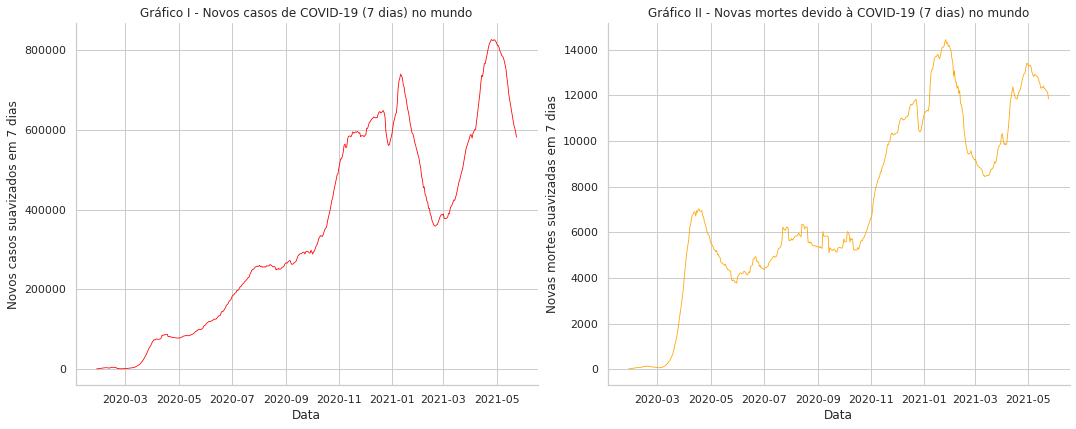

In [10]:
#Criando dataframe para o mundo
df_mundo = df.loc[df.location == 'World']

#Criando a figure
figure, ax = plt.subplots(figsize=(15,6), ncols=2)

#Configurando o estilo do seaborn
sns.despine(top=True, right=True)
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":12}) 

#Plotando o Gráfico I
sns.lineplot(x='date', y='new_cases_smoothed', ax=ax[0], data=df_mundo, color='red', linewidth=.8 )
ax[0].set_ylabel("Novos casos suavizados em 7 dias")
ax[0].set_xlabel("Data")
ax[0].set_title("Gráfico I - Novos casos de COVID-19 (7 dias) no mundo")

#Plotando o Gráfico II
sns.lineplot(x='date', y='new_deaths_smoothed', ax=ax[1], data=df_mundo, color='orange', linewidth=.8 )
ax[1].set_ylabel("Novas mortes suavizadas em 7 dias")
ax[1].set_xlabel("Data")
ax[1].set_title("Gráfico II - Novas mortes devido à COVID-19 (7 dias) no mundo")

#Exibindo os gráficos
plt.tight_layout()

Podemos notar, com bastante clareza, o aumento nos números de casos de Covid-19 desde o início da pandemia, com poucos pontos de queda. O que é seguido de perto pelos números de mortes causadas pela doença, com um expressivo e rápido aumento no início de 2020, quando tinhamos poucas, ou nenhuma, informação à respeito do virus.

Por outro lado, percebemos uma forte queda nos números de novos casos e de mortes nos primeiros meses de 2021. Uma queda bastante expressiva, porém que veio seguida de um novo rápido aumento.

Vamos tentar explorar e analisar essa forte variação de novos casos e mortes nos primeiros meses de 2021, primeiramente separando a análise por continente. 

In [11]:
#Mudando o estilo do Seaborn
sns.set_theme(style='white')

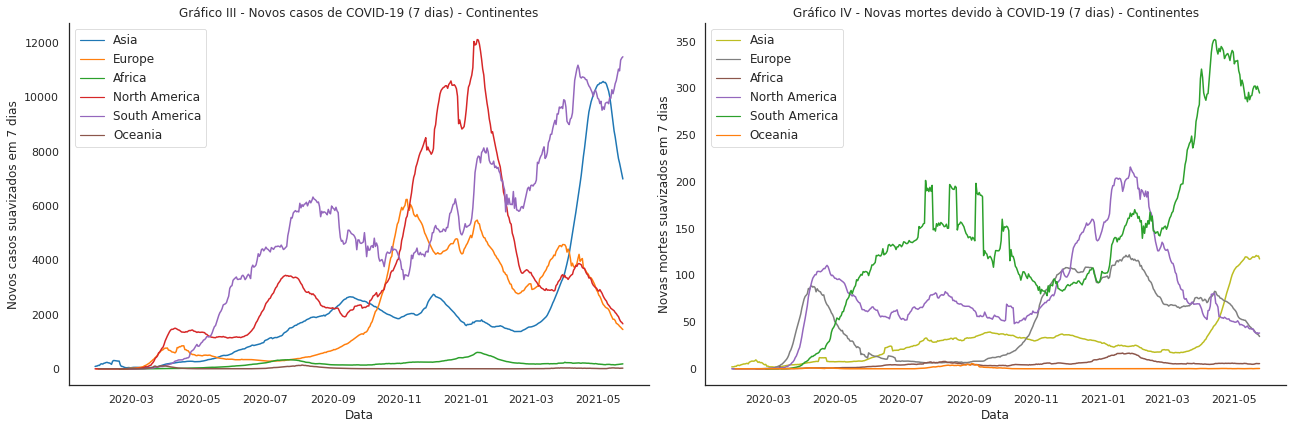

In [12]:
#Criando a figure
figure, ax = plt.subplots(figsize=(18,6), ncols=2)

#Configurando o estilo do seaborn
sns.despine(top=True, right=True)
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":12}) 


#Plotando o Gráfico III
sns.lineplot(x='date', y='new_cases_smoothed', ax=ax[0], data=df, hue='continent', palette='tab10', linewidth=1.5, ci=None)

ax[0].set_ylabel("Novos casos suavizados em 7 dias")
ax[0].set_xlabel("Data")
ax[0].set_title("Gráfico III - Novos casos de COVID-19 (7 dias) - Continentes")
ax[0].legend(fontsize=12, loc='best')

#Plotando o Gráfico IV
sns.lineplot(x='date', y='new_deaths_smoothed', ax=ax[1], data=df, hue='continent', palette='tab10_r', linewidth=1.5, ci=None)

ax[1].set_ylabel("Novas mortes suavizados em 7 dias")
ax[1].set_xlabel("Data")
ax[1].set_title("Gráfico IV - Novas mortes devido à COVID-19 (7 dias) - Continentes")
ax[1].legend(fontsize=12, loc='best')

#Exibindo os gráficos
plt.tight_layout()

Podemos perceber algo bastante interessante: o período em que o gráfico da análise mundial (Gráficos I e iI) apresenta queda é igual ao período em que a américa do norte e o continente europeu também apresentam queda no gráfico da análise por continentes (Gráficos III e IV).

Vamos plotar os quatro gráfico juntos para uma visualização melhor.

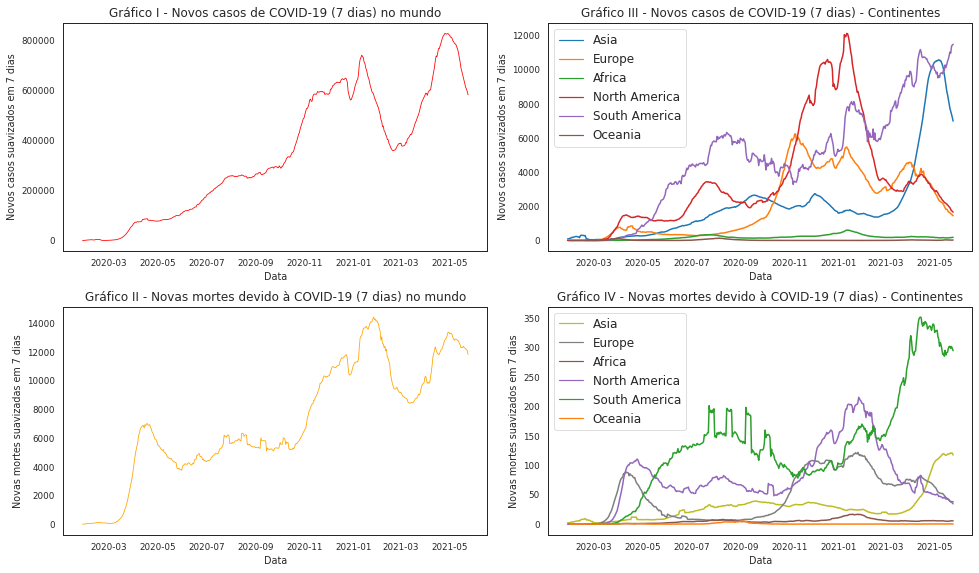

In [13]:
#Criando a figure
figure, ax = plt.subplots(figsize=(14,8), nrows=2 ,ncols=2)

#Plotando o Gráfico I
sns.lineplot(x='date', y='new_cases_smoothed', ax=ax[0,0], data=df_mundo, color='red', linewidth=.8 )
ax[0,0].set_ylabel("Novos casos suavizados em 7 dias")
ax[0,0].set_xlabel("Data")
ax[0,0].set_title("Gráfico I - Novos casos de COVID-19 (7 dias) no mundo")

#Plotando o Gráfico III
sns.lineplot(x='date', y='new_cases_smoothed', ax=ax[0,1], data=df, hue='continent', palette='tab10', linewidth=1.5, ci=None)

ax[0,1].set_ylabel("Novos casos suavizados em 7 dias")
ax[0,1].set_xlabel("Data")
ax[0,1].set_title("Gráfico III - Novos casos de COVID-19 (7 dias) - Continentes")
ax[0,1].legend(fontsize=12, loc='best')

#Plotando o Gráfico II
sns.lineplot(x='date', y='new_deaths_smoothed', ax=ax[1,0], data=df_mundo, color='orange', linewidth=.8 )
ax[1,0].set_ylabel("Novas mortes suavizadas em 7 dias")
ax[1,0].set_xlabel("Data")
ax[1,0].set_title("Gráfico II - Novas mortes devido à COVID-19 (7 dias) no mundo")

#Plotando o Gráfico IV
sns.lineplot(x='date', y='new_deaths_smoothed', ax=ax[1,1], data=df, hue='continent', palette='tab10_r', linewidth=1.5, ci=None)

ax[1,1].set_ylabel("Novas mortes suavizados em 7 dias")
ax[1,1].set_xlabel("Data")
ax[1,1].set_title("Gráfico IV - Novas mortes devido à COVID-19 (7 dias) - Continentes")
ax[1,1].legend(fontsize=12, loc='best')

#Exibindo os gráficos
plt.tight_layout()

Ao compararmos os 4 gráficos lado a lado podemos prceber que o período em que a américa do norte e a europa apresentam queda em seus numeros de novos casos e de óbitos pela Covid-19 coincide com a diminuição desses mesmos números nos gráficos referentes ao mundo, o que pode explicar a queda global no inicio de 2021, visto que estas localizações representavam a maior parte dos casos no mundo. Uma matéria publicada no site El País retrata bem isto, como pode ser lido [aqui](https://brasil.elpais.com/internacional/2021-02-20/mundo-consolida-o-primeiro-retrocesso-do-coronavirus-desde-o-inicio-da-pandemia.html).

Por outro lado, o repentino aumento que vemos logo em seguida coincide com os aumentos dos númeos de novos casos e de óbitos na américa do sul, puxados pelo Brasil (como [noticiado](https://forbes.com.br/colunas/2020/04/oms-aumento-nos-casos-de-coronavirus-na-america-do-sul-e-preocupante/) pela Forbes),  e no continente asiatico, principalmente na índia (como pode ser lido [nesta matéria](https://www.bbc.com/portuguese/internacional-56900334) da BBC). O que pode explicar o aumento da curva referente a esses números em escala global.

A queda na diminuição de novos casos, vista no Gráfico I, pode ser explicada pela queda desse mesmo número no continente asiático, visto no Gráfico III. Percebemos, ainda, que a américa do sul é a região com a maior quantidade de novos casos ao final do período analisado, como pode ser visto no Gráfico II.

Vamos agora retirar algumas informações estatísticas dos dados que estamos analisando.


In [22]:
#Passando os valores para listas para serem exibidos
df_stats_obito = df[["location","total_deaths"]].loc[df.continent.notnull()].sort_values(by="total_deaths", ascending=False).values.tolist()
df_stats_casos = df[["location","total_cases"]].loc[df.continent.notnull()].sort_values(by="total_cases", ascending=False).values.tolist()
df_stats_obito_million = df[["location","total_deaths_per_million"]].loc[df.location == "World"].sort_values(by="total_deaths_per_million", ascending=False).values.tolist()
df_stats_casos_million = df[["location","total_cases_per_million"]].loc[df.location == "World"].sort_values(by="total_cases_per_million", ascending=False).values.tolist()
populacao = df.population.loc[(df.date == '2020-12-31') & (df.location =='World')].sort_values(ascending=False).values.tolist()
mortalidade = (df.total_deaths.max() * 100000/populacao[0])
letalidade = (df.total_deaths.max() * 100)/df.total_cases.max()

#Exibindo os valores armazenados

print("---------------ESTATÍSTICAS DA COVID-19 ATÉ O ÚLTIMO DIA ANALISADO - 25/05/2021, COM DADOS DO DIA 24/05/2021--------------")
print("--------------------------------------------------------------------------------------------------------------------------\n")
print("* Casos totais de Covid-19 no mundo: {:,.0f}".format(df.total_cases.max()))
print("* Quantidade de óbitos devidos à Covid-19: {:,.0f}".format(df.total_deaths.max()))
print("* O país com a maior quantidade de casos é",df_stats_casos[0][0], "com {:,.0f}".format(df_stats_casos[0][1]), "casos.")
print("* O país com a maior quantidade de óbitos é",df_stats_obito[0][0], "com {:,.0f}".format(df_stats_obito[0][1]), "óbitos.")
print("* O mundo apresenta, até a data deste estudo, {:,.0f}".format(df_stats_obito_million[0][1]), "óbitos por milhão de infectados.")
print("* O mundo apresenta, até a data deste estudo, {:,.0f}".format(df_stats_casos_million[0][1]), "novos casos de Covid-19 por milhão de habitantes.")
print("* A taxa de letalidade mundial da Covid-19, até a data deste estudo, é de {:.2f}%".format(letalidade),".")
print("* A taxa de mortalidade da Covid-19, levando em consideração a população mundial em 2020, é de {:.0f}".format(mortalidade),"a cada 100.000 habitantes.\n")
print("==========================================================================================================================")


---------------ESTATÍSTICAS DA COVID-19 ATÉ O ÚLTIMO DIA ANALISADO - 25/05/2021, COM DADOS DO DIA 24/05/2021--------------
--------------------------------------------------------------------------------------------------------------------------

* Casos totais de Covid-19 no mundo: 167,316,360
* Quantidade de óbitos devidos à Covid-19: 3,473,036
* O país com a maior quantidade de casos é United States com 33,143,662 casos.
* O país com a maior quantidade de óbitos é United States com 590,320 óbitos.
* O mundo apresenta, até a data deste estudo, 446 óbitos por milhão de infectados.
* O mundo apresenta, até a data deste estudo, 21,465 novos casos de Covid-19 por milhão de habitantes.
* A taxa de letalidade mundial da Covid-19, até a data deste estudo, é de 2.08% .
* A taxa de mortalidade da Covid-19, levando em consideração a população mundial em 2020, é de 45 a cada 100.000 habitantes.



Isso nos dá um parametro geral da evolução da pandemia até o momento. Iremos agora visualizar alguns desses dados através de mapas.

In [ ]:
##### Pré-processando os dados necessários para criar os mapas #####

#Criando o dataframe para o mapa
df_mapa = df.loc[df.date == '2021-05-24']
df_mapa = df_mapa.loc[df_mapa.continent.notnull()]

#Editando o nome dos paises na coluna location de modo a serem iguais ao arquivo json utilizado na biblioteca folium
df_mapa.location = df_mapa.location.replace(['United States'], "United States of America")
df_mapa.location = df_mapa.location.replace(['Tanzania'], "United Republic of Tanzania")
df_mapa.location = df_mapa.location.replace(['Democratic Republic of Congo'], "Democratic Republic of the Congo")
df_mapa.location = df_mapa.location.replace(['Guinea-Bissau'], "Guinea Bissau")
df_mapa.location = df_mapa.location.replace(["Cote d'Ivoire"], "Ivory Coast")
df_mapa.location = df_mapa.location.replace(['Congo'], "Republic of the Congo")
df_mapa.location = df_mapa.location.replace(['Serbia'], "Republic of Serbia")
df_mapa.location = df_mapa.location.replace(['Czechia'], "Czech Republic")
df_mapa.location = df_mapa.location.replace(['North Macedonia'], "Macedonia")

#URL do arquivo json utilizado pela biblioteca folium
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
world = f'{url}/world-countries.json'

In [74]:
##### Criando o Mapa I #####

#Criando a figura para comportar o mapa
fig_obitos=Figure(width='72%',)
fig_obitos.header.add_child(Element("<style>body {overflow-y: hidden;}</style>"))
fig_obitos.html.add_child(Element("<h3 align='center' style='font-size:20px'>Mapa de óbitos devido à Covid-19 no mundo<b></b></h3>"))

#Configurando o estilo do mapa
mapa_obitos = folium.Map(location=[0,0],
               zoom_start=2,               
               max_zoom=6,
               min_zoom=2,
               tiles='https://api.mapbox.com/styles/v1/luisguimaraes/ckp7hro3q0pzj18qe3k56b9fj/tiles/256/{z}/{x}/{y}@2x?access_token=pk.eyJ1IjoibHVpc2d1aW1hcmFlcyIsImEiOiJja3A3aGltamIwMDlyMnhtczV6NDVsdzQwIn0.qb6NR-BDFNkj6R2M8X35yA', 
               attr="<a href=https://www.mapbox.com/>Mapbox</a>")

#Adicionando o mapa à figura
fig_obitos.add_child(mapa_obitos)

#Configurando o choropleth
folium.Choropleth(
    geo_data=world,
    name='choropleth COVID-19',
    data=df_mapa,
    columns=['location', 'total_deaths'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.1,
    nan_fill_color='white',
    legend_name='Número de óbitos'
).add_to(mapa_obitos)

#Exibindo o mapa criado
mapa_obitos

In [75]:
##### Criando o Mapa II #####

#Criando a figura para comportar o mapa
fig_casos=Figure(width='72%',)
fig_casos.header.add_child(Element("<style>body {overflow-y: hidden;}</style>"))
fig_casos.html.add_child(Element("<h3 align='center' style='font-size:20px'>Mapa da quantidade total de casos de Covid-19 no mundo<b></b></h3>"))

#Configurando o estilo do mapa
mapa_casos = folium.Map(location=[0,0],
               zoom_start=2,               
               max_zoom=6,
               min_zoom=2,
               tiles='https://api.mapbox.com/styles/v1/luisguimaraes/ckp7hro3q0pzj18qe3k56b9fj/tiles/256/{z}/{x}/{y}@2x?access_token=pk.eyJ1IjoibHVpc2d1aW1hcmFlcyIsImEiOiJja3A3aGltamIwMDlyMnhtczV6NDVsdzQwIn0.qb6NR-BDFNkj6R2M8X35yA', 
               attr="<a href=https://www.mapbox.com/>Mapbox</a>")

#Adicionando o mapa à figura
fig_casos.add_child(mapa_casos)

#Configurando o choropleth
folium.Choropleth(
    geo_data=world,
    name='choropleth COVID-19',
    data=df_mapa,
    columns=['location', 'total_cases'],
    key_on='feature.properties.name',
    fill_color='YlOrBr',
    fill_opacity=0.7,
    line_opacity=0.1,
    nan_fill_color='white',
    legend_name='Quantidade de casos'
).add_to(mapa_casos)

#Exibindo o mapa criado
mapa_casos





...

### Comparação do mês de abril de 2020 e de abril de 2021


* *Ver para a data mais atual, quais os países que têm mais casos e mortes. Veja o exemplo:*
    * `df.loc[df.date == '2020-06-14'].sort_values(by="total_cases", ascending=False)`
    * `df.loc[df.date == '2020-06-14'].sort_values(by="total_deaths", ascending=False)`
* Plotar um gráfico de barras para os 5 países com mais mortes
    * `df.loc[df.date == '2020-06-14', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]`
    * `ax.bar('location', 'total_deaths', data=top5_total_deaths)`
* Plotar um gráfico de linhas para ver a evolução do total de casos de COVID-19 no mundo.
    * `df.loc[df.location == "World", "total_deaths"].reset_index(drop=True).plot()`
* [OPCIONAL] Plotar um gráfico de dispersão considerando `gdp_per_capita` (ou seja, o PIB dos países) pelo número total de mortos. Pegue a data mais recente apenas.
    * Lembre-se que não é nada conclusivo, pois envolve fatores como proporcão de testes, etc.


Vamos......

### Panorama de vacinação mundial

### Aumento, estabilidade ou queda?

## Panorama brasileiro

* Criar uma cópia do DataFrame apenas com o Brasil
    * `df_brasil = df.loc[df.location == "Brazil"].copy()`
* Identificar quando foi registrada a primeira morte no Brasil
* Identificar quantos dias demorou para registrarmos a primeira morte, considerando o primeiro caso de COVID-19 registrado.
* Plotar gráficos de linha em escalas linear e logarítmica para os casos totais e mortes totais.

### Qual a situação do Brasil hoje?

### Quais os estados com os maiores e menores números?

### Panorama de vacinação no Brasil

### Aumento, estabilidade ou queda?

# Conclusão

*Escreva suas conclusões e análises sobre os dados relativos à COVID-19...*